In [1]:
#Load packages needed for analysis
!pip install pandas numpy matplotlib tabulate jupyter-dash seaborn heatmapz pingouin scipy plotly statsmodels jupyter_dash

In [2]:
#Load packages we need
import pandas as pd #dataframe wrangling
from pylab import rcParams
import seaborn as sns #plotting
import numpy as np
import matplotlib.pyplot as plt #plotting
from heatmap import heatmap, corrplot #heatmap

#to run statistical analysis like t-test and chi-square stats
import pingouin #statistics
from scipy.stats import chi2_contingency #statistics
import statsmodels.formula.api as sfm #model linear regression

In [3]:
df = pd.read_csv('kidney_disease_data.csv')
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,classification_num
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,1.0
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,6000.0,NaN,no,no,no,good,no,no,ckd,1.0
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,1.0
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,1.0
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,1.0


In [4]:
print("The dataset has", df.shape[1], "variables describing",
      df.shape[0], "patients with/without chronic kidney disease")

The dataset has 26 variables describing 400 patients with/without chronic kidney disease


In [5]:
df.info() #concise summary of our DataFrame
#df.dtypes #we can also use df.dtypes but gives you only the types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [6]:
# function to describe the field dtype, missing and unique values
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value 1'] = df.iloc[0].values
    summary['Sample Value 2'] = df.iloc[1].values
    return summary

description(df)

,Name,dtypes,Missing,Uniques,Sample Value 1,Sample Value 2
0,id,int64,0,400,0,1
1,age,float64,9,76,48.0,7.0
2,blood_pressure,float64,12,10,80.0,50.0
3,specific_gravity,float64,47,5,1.02,1.02
4,albumin,float64,46,6,1.0,4.0
5,sugar,float64,49,6,0.0,0.0
6,pus_cell,object,65,2,normal,normal
7,pus_cell_clumps,object,4,2,notpresent,notpresent
8,bacteria,object,4,2,notpresent,notpresent
9,blood_glucose_random,float64,44,146,121.0,NaN


C:\Users\crist\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


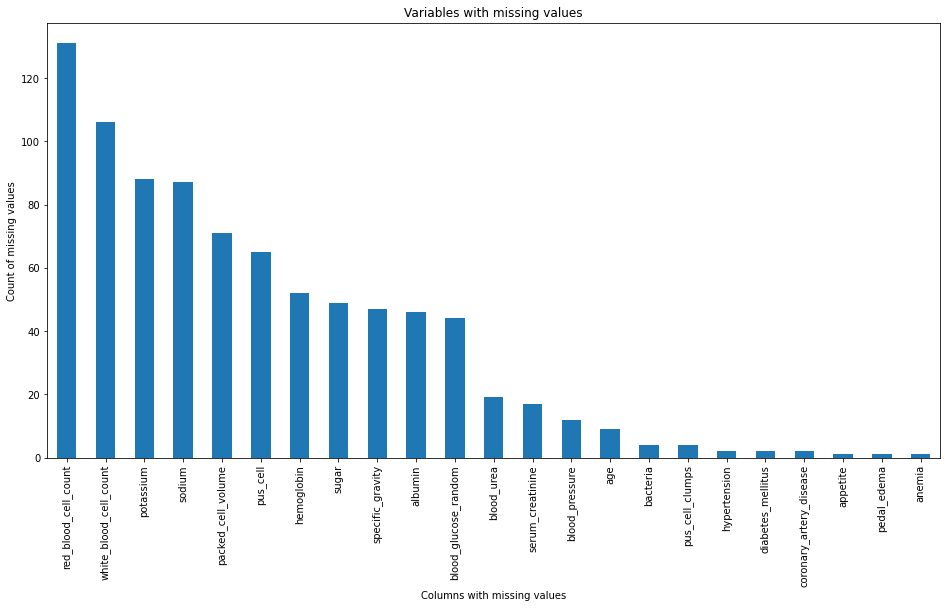

In [7]:
def plot_missing(df):
    #Find columns with missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace = True, ascending = False)
    
    #Plot missing values by count
    missing.plot.bar(figsize=(16, 8))
    plt.title('Variables with missing values')
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count of missing values')

plot_missing(df)

In [8]:
df['classification'].drop_duplicates()

0         ckd
250    notckd
Name: classification, dtype: object

In [9]:
df['classification'].astype('category')
df['anemia'].astype('category')
df['pus_cell'].astype('category')
df['pus_cell_clumps'].astype('category')
df['bacteria'].astype('category')
df['hypertension'].astype('category')
df['diabetes_mellitus'].astype('category')
df['coronary_artery_disease'].astype('category')
df['appetite'].astype('category')
df['pedal_edema'].astype('category')

0       no
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: pedal_edema, Length: 400, dtype: category
Categories (2, object): ['no', 'yes']

EDA Question 1:

Selecting columns of interest and target feature(s):

○ Which columns in your data sets will help you answer the questions posed by your problem statement?

○ Which columns represent the key pieces of information you want to examine (i.e. your target variables)?

○ How many numerical, textual, datetime etc. columns are in your dataset?

○ Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process

In [10]:
df = df.set_index(['id'])
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,...,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,classification_num
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,1.0
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,...,6000.0,NaN,no,no,no,good,no,no,ckd,1.0
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,1.0
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,1.0


In [11]:
#summary statistics per column
df_stats = df.describe()
df_stats

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,classification_num
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


# Distribution Plots with CKD Labels

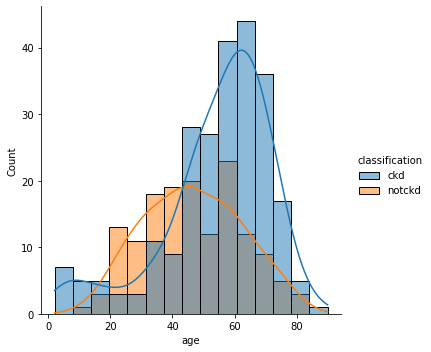

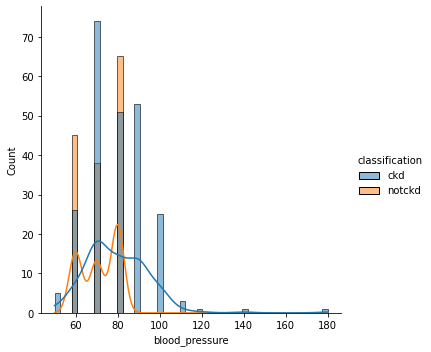

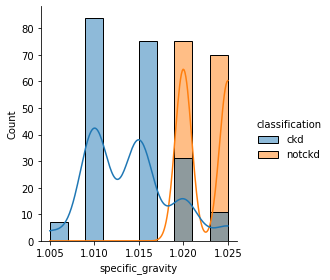

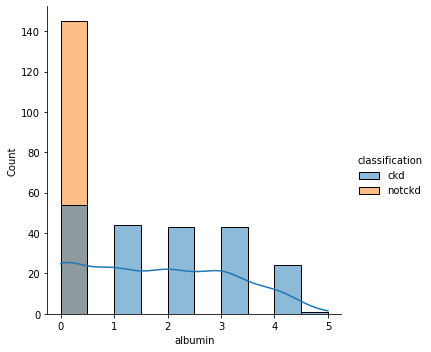

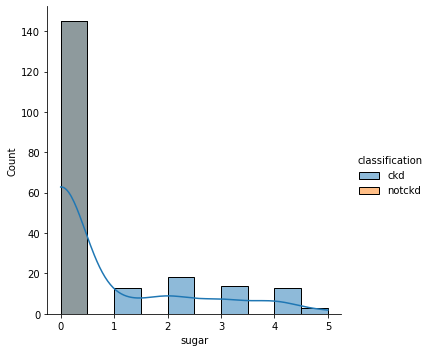

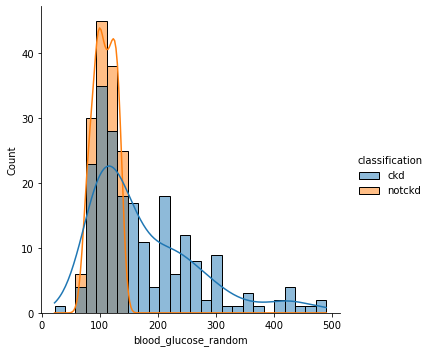

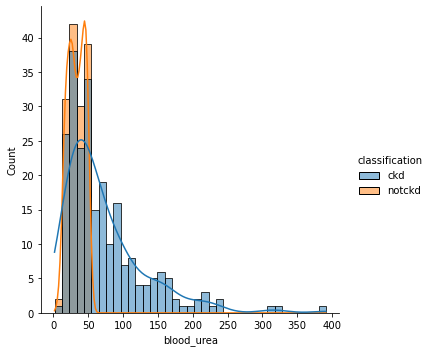

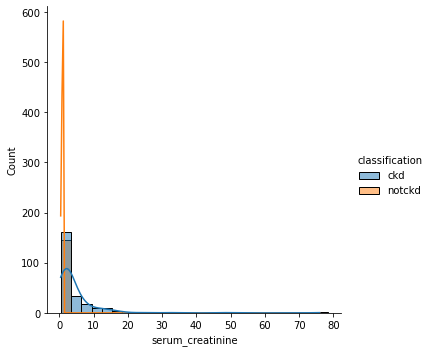

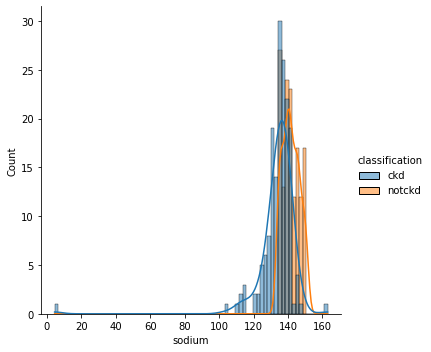

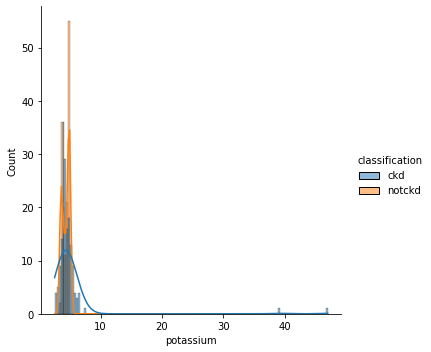

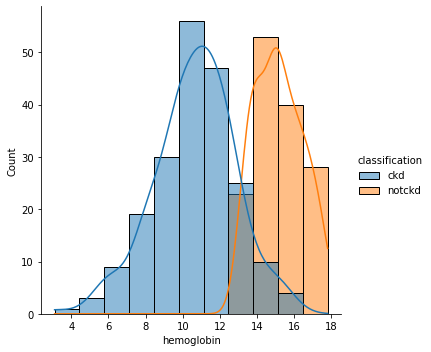

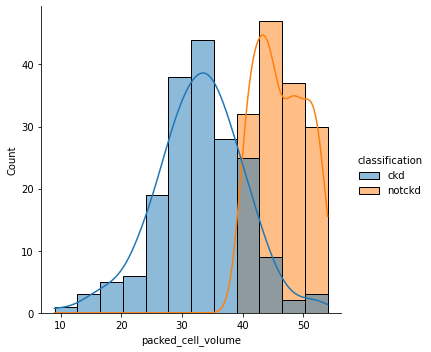

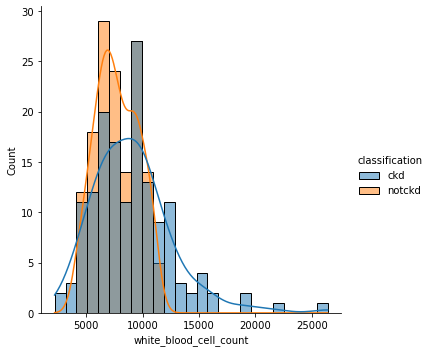

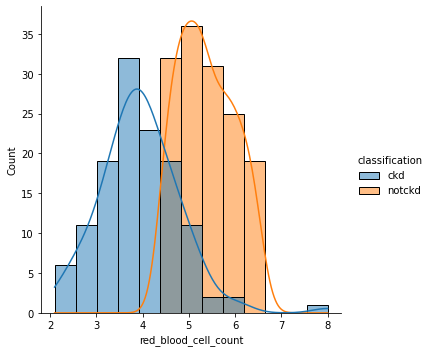

In [12]:
sns.displot(df, x='age', hue="classification", kde = True)
sns.displot(df, x='blood_pressure', hue="classification", kde = True)
sns.displot(df, x='specific_gravity', hue="classification", kde = True, height=4, aspect=.9)
sns.displot(df, x='albumin', hue="classification", kde = True)
sns.displot(df, x='sugar',hue="classification", kde = True)
sns.displot(df, x='blood_glucose_random', hue="classification", kde= True)
sns.displot(df,x='blood_urea', hue = 'classification', kde = True)
sns.displot(df, x="serum_creatinine", binwidth = 3, bins =5, hue="classification", kde= True)
sns.displot(df,x='sodium', hue='classification', kde= True)
sns.displot(df,x='potassium', hue = 'classification', kde= True)
sns.displot(df, x="hemoglobin", hue="classification", kde = True)
sns.displot(df, x='packed_cell_volume', hue='classification', kde = True)
sns.displot(df, x='white_blood_cell_count', hue='classification', kde = True)
sns.displot(df, x='red_blood_cell_count', hue='classification', kde = True)

# The PPS or ppscore library is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix)

In [13]:
#install library for Predictive Power Score
!pip install ppscore
import ppscore as pps

In [14]:
#calculate the PPS of x predicting y: (x: different biomarker columns, y: classification)
#sample with serum creatine as x predicting y
pps.score(df,x = "serum_creatinine", y = "classification")


{'x': 'serum_creatinine',
 'y': 'classification',
 'ppscore': 0.7508133245805542,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.5352480417754569,
 'model_score': 0.8841900046353489,
 'model': DecisionTreeClassifier()}

In [15]:
pps.score(df,x = "serum_creatinine", y = "classification_num")

{'x': 'serum_creatinine',
 'y': 'classification_num',
 'ppscore': 0.5425094017600396,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.3785900783289817,
 'model_score': 0.17320140142243934,
 'model': DecisionTreeRegressor()}

calculate the PPS of all the predictors in the dataframe against a target y: classification

In [16]:
pps.predictors(df, "classification")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,classification_num,classification,1.000000,classification,True,weighted F1,0.540000,1.000000,DecisionTreeClassifier()
1,packed_cell_volume,classification,0.797910,classification,True,weighted F1,0.489362,0.896805,DecisionTreeClassifier()
2,hemoglobin,classification,0.786304,classification,True,weighted F1,0.517241,0.896836,DecisionTreeClassifier()
3,red_blood_cell_count,classification,0.778963,classification,True,weighted F1,0.420074,0.871815,DecisionTreeClassifier()
4,specific_gravity,classification,0.760153,classification,True,weighted F1,0.507082,0.881775,DecisionTreeClassifier()
5,serum_creatinine,classification,0.750813,classification,True,weighted F1,0.535248,0.884190,DecisionTreeClassifier()
6,albumin,classification,0.694067,classification,True,weighted F1,0.502825,0.847898,DecisionTreeClassifier()
7,hypertension,classification,0.427269,classification,True,weighted F1,0.547739,0.740976,DecisionTreeClassifier()
8,sodium,classification,0.418801,classification,True,weighted F1,0.488818,0.702902,DecisionTreeClassifier()
9,potassium,classification,0.387907,classification,True,weighted F1,0.487179,0.686106,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='y'>

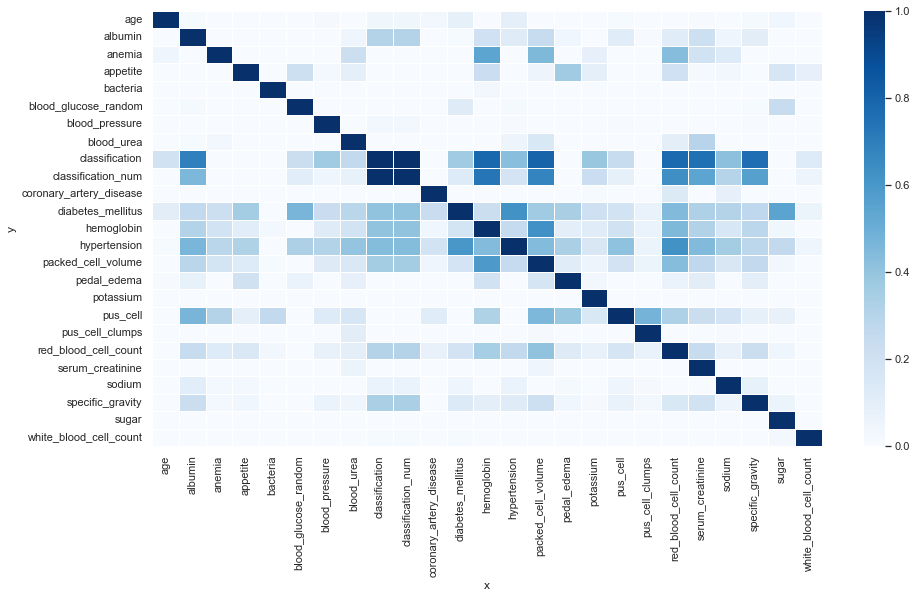

In [17]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.9, annot=False)

In [18]:
corrm = df.corr()
corrm['classification_num'].sort_values(ascending = False)

classification_num        1.000000
albumin                   0.627090
blood_glucose_random      0.419672
blood_urea                0.380605
sugar                     0.344070
serum_creatinine          0.299969
blood_pressure            0.294077
white_blood_cell_count    0.231919
age                       0.227268
potassium                 0.084541
sodium                   -0.375674
red_blood_cell_count     -0.699089
specific_gravity         -0.732163
packed_cell_volume       -0.741427
hemoglobin               -0.768919
Name: classification_num, dtype: float64

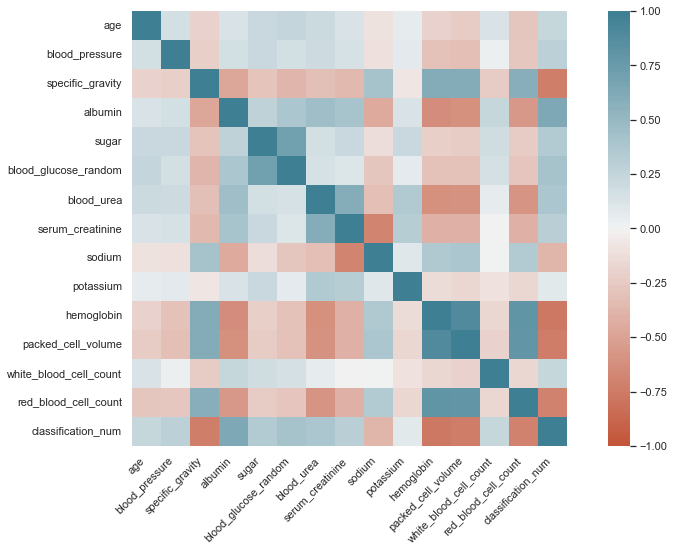

In [19]:
#Plot correlation matrix to compare with pps matrix
ax = sns.heatmap(
    corrm, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# What is a Dummy Variable?
A dummy variable (is, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, etc.

# What are the benefits of a Dummy Variable?
Regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [20]:
df.dtypes #which categories are categorical/object (re-checking)

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
classification              object
classification_num         float64
dtype: object

In [21]:
data = df.copy() #make a copy of our cleaned dataset called data
X = data[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia','classification'
       ]]
#convert all object/category columns into dummy/indicator variables.
#drop_first= True to drop one column from each categorical variable group to act as the reference category, and to avoid the “Dummy Variable Trap:” perfect multicollinearity between the predictors.
X = pd.get_dummies(data= X, prefix = ['pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus', 'coronary_artery_disease','appetite','pedal_edema','anemia','classification_ckd'], drop_first=True)
X.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell_normal,pus_cell_clumps_present,bacteria_present,hypertension_yes,diabetes_mellitus_yes,coronary_artery_disease_yes,appetite_poor,pedal_edema_yes,anemia_yes,classification_ckd_notckd
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [22]:
#check new columns with dummy variables
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'pus_cell_normal',
       'pus_cell_clumps_present', 'bacteria_present', 'hypertension_yes',
       'diabetes_mellitus_yes', 'coronary_artery_disease_yes', 'appetite_poor',
       'pedal_edema_yes', 'anemia_yes', 'classification_ckd_notckd'],
      dtype='object')

# Multiple Linear Regression

In [23]:
data = df.copy() #make a copy of our cleaned dataset called data
#convert all object/category columns into dummy/indicator variables.
columns = ['pus_cell','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus',
           'coronary_artery_disease','appetite','pedal_edema','anemia','classification']
data = pd.get_dummies(data,columns=columns)
data

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,classification_ckd,classification_notckd
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,1,0,0,1,1,0,0,1,1,0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,1,0,1,0,1,0,0,1
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,1,0,1,0,1,0,0,1
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,1,0,1,0,1,0,0,1


In [24]:
#ALL VARIABLES to CKD
formula = 'classification_ckd ~ age + blood_pressure + specific_gravity + albumin + sugar + blood_glucose_random + blood_urea + serum_creatinine + sodium + potassium + hemoglobin + packed_cell_volume + white_blood_cell_count + red_blood_cell_count + pus_cell_normal ++ pus_cell_clumps_present + bacteria_present + hypertension_yes + diabetes_mellitus_yes + coronary_artery_disease_yes + appetite_poor + pedal_edema_yes + anemia_yes'
model = sfm.ols(formula = formula, data = data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     classification_ckd   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     63.98
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           6.85e-74
Time:                        22:50:49   Log-Likelihood:                 83.259
No. Observations:                 203   AIC:                            -118.5
Df Residuals:                     179   BIC:                            -39.00
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

How to interpret the unstandardized regression coefficients?
These are used to interpret the effect of each independent variable on the outcome(response/output). Their interpretation is straightforward and intuitive.

– All other variables held constant, a shift of 1 unit in Xi(predictors) implies there is an average change of ai units in Y(outcome).



# Standardized regression coefficients
The standardized coefficients of regression are obtained by training(or running) a linear regression model on the standardized form of the variables.

The standardized variables are calculated by subtracting the mean and dividing by the standard deviation for each observation, i.e. calculating the Z-score. Then, they don’t represent their original scales since they have no unit.

In [25]:
#ALL VARIABLES to CKD

#import stats
from scipy import stats

# standardizing dataframe

#using drop na

df_z = data.dropna().apply(stats.zscore)

#df_z = data.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

#df_z = data.select_dtypes(include=[np.number]).fillna(data.mean()).apply(stats.zscore)

model_standardized = sfm.ols(formula = formula, data = df_z)
fitted1 = model_standardized.fit()
print(fitted1.summary())


                            OLS Regression Results                            
Dep. Variable:     classification_ckd   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     63.98
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           6.85e-74
Time:                        22:50:50   Log-Likelihood:                -62.564
No. Observations:                 203   AIC:                             173.1
Df Residuals:                     179   BIC:                             252.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [26]:
df_z

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,classification_ckd,classification_notckd
id,,,,,,,,,,,,,,,,,,,,,
3,-0.247206,-0.428141,-2.493056,2.342066,-0.370974,-0.279313,0.060094,0.527328,-4.021049,-0.672186,...,0.311925,-0.292509,-2.5,2.553139,-2.5,2.553139,-2.868322,2.943920,1.252845,-1.252845
5,0.521879,1.310111,-0.717300,1.604951,-0.370974,-0.850436,-0.618851,-0.391974,0.477522,-0.444763,...,0.311925,-0.292509,0.4,-0.391675,-2.5,2.553139,0.348636,-0.339683,1.252845,-1.252845
9,0.073246,1.310111,0.170577,0.867835,-0.370974,-0.903564,1.177068,1.684966,-3.585703,-0.282318,...,0.311925,-0.292509,-2.5,2.553139,0.4,-0.391675,-2.868322,2.943920,1.252845,-1.252845
11,0.714150,-0.428141,-1.605178,1.604951,-0.370974,3.213836,0.147700,0.152798,-1.118745,-0.119873,...,0.311925,-0.292509,-2.5,2.553139,-2.5,2.553139,0.348636,-0.339683,1.252845,-1.252845
12,1.034602,-0.428141,-0.717300,1.604951,0.660639,0.929343,0.410517,-0.051492,-0.102939,0.399951,...,-3.205897,3.418699,-2.5,2.553139,-2.5,2.553139,0.348636,-0.339683,1.252845,-1.252845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.201427,0.440985,0.170577,-0.606395,-0.370974,0.026171,-0.093216,-0.596263,1.638443,0.107550,...,0.311925,-0.292509,0.4,-0.391675,0.4,-0.391675,0.348636,-0.339683,-0.798183,0.798183
396,-0.631748,-0.428141,1.058455,-0.606395,-0.370974,-0.837154,-0.487442,-0.357925,0.332407,-0.347296,...,0.311925,-0.292509,0.4,-0.391675,0.4,-0.391675,0.348636,-0.339683,-0.798183,0.798183
397,-2.554460,0.440985,0.170577,-0.606395,-0.370974,-0.505106,-0.596949,-0.562215,-0.248054,-0.054895,...,0.311925,-0.292509,0.4,-0.391675,0.4,-0.391675,0.348636,-0.339683,-0.798183,0.798183


How to interpret the standardized regression coefficients?
The interpretation of standardized regression coefficients is non-intuitive compared to their unstandardized versions:

A change of 1 standard deviation in X is associated with a change of β standard deviations of Y.

The standardized coefficient is measured in units of standard deviation. A beta value of 2.25 indicates that a change of one standard deviation in the independent variable results in a 2.25 standard deviations increase in the dependent variable.


# Creating a train and test dataset.

In [27]:
data1= data.filter(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'pus_cell_normal',
       'pus_cell_clumps_present', 'bacteria_present', 'hypertension_yes',
       'diabetes_mellitus_yes', 'coronary_artery_disease_yes', 'appetite_poor',
       'pedal_edema_yes', 'anemia_yes'], axis = 1)
data1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,red_blood_cell_count,pus_cell_normal,pus_cell_clumps_present,bacteria_present,hypertension_yes,diabetes_mellitus_yes,coronary_artery_disease_yes,appetite_poor,pedal_edema_yes,anemia_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,5.2,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,NaN,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,NaN,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,3.9,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,4.6,1,0,0,0,0,0,0,0,0


In [28]:
#standardized training set

zdata1= df_z.filter(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'pus_cell_normal',
       'pus_cell_clumps_present', 'bacteria_present', 'hypertension_yes',
       'diabetes_mellitus_yes', 'coronary_artery_disease_yes', 'appetite_poor',
       'pedal_edema_yes', 'anemia_yes'], axis = 1)
zdata1.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,red_blood_cell_count,pus_cell_normal,pus_cell_clumps_present,bacteria_present,hypertension_yes,diabetes_mellitus_yes,coronary_artery_disease_yes,appetite_poor,pedal_edema_yes,anemia_yes
id,,,,,,,,,,,,,,,,,,,,,
3,-0.247206,-0.428141,-2.493056,2.342066,-0.370974,-0.279313,0.060094,0.527328,-4.021049,-0.672186,...,-0.889670,-1.873796,3.205897,-0.261574,1.562267,-0.586831,-0.292509,2.553139,2.553139,2.943920
5,0.521879,1.310111,-0.717300,1.604951,-0.370974,-0.850436,-0.618851,-0.391974,0.477522,-0.444763,...,-0.389107,-1.873796,-0.311925,-0.261574,1.562267,1.704068,-0.292509,-0.391675,2.553139,-0.339683
9,0.073246,1.310111,0.170577,0.867835,-0.370974,-0.903564,1.177068,1.684966,-3.585703,-0.282318,...,-1.089895,-1.873796,3.205897,-0.261574,1.562267,1.704068,-0.292509,2.553139,-0.391675,2.943920
11,0.714150,-0.428141,-1.605178,1.604951,-0.370974,3.213836,0.147700,0.152798,-1.118745,-0.119873,...,-0.989782,-1.873796,3.205897,-0.261574,1.562267,1.704068,-0.292509,2.553139,2.553139,-0.339683
12,1.034602,-0.428141,-0.717300,1.604951,0.660639,0.929343,0.410517,-0.051492,-0.102939,0.399951,...,-1.390232,0.533676,3.205897,-0.261574,1.562267,1.704068,3.418699,2.553139,2.553139,-0.339683


In [29]:
data2 = data['classification_ckd']
data2

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification_ckd, Length: 400, dtype: uint8

In [30]:
zdata2 = df_z['classification_ckd']
zdata2

id
3      1.252845
5      1.252845
9      1.252845
11     1.252845
12     1.252845
         ...   
395   -0.798183
396   -0.798183
397   -0.798183
398   -0.798183
399   -0.798183
Name: classification_ckd, Length: 203, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(1)
data1_train, data1_test, data2_train, data2_test = train_test_split(data1, data2, train_size = 0.7, test_size = 0.3, random_state = 100)


In [32]:
# We specify random seed so that the standardized train and test data set always have the same rows, respectively
np.random.seed(1)
zdata1_train, zdata1_test, zdata2_train, zdata2_test = train_test_split(zdata1, zdata2, train_size = 0.7, test_size = 0.3, random_state = 100)


# Using Sklearn linear regression model

In [33]:
#import linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
#interpolate na values with column mean
LR.fit(data1_train.fillna(data1_test.mean()), data2_train)

LinearRegression()

In [34]:
print(data1_train.shape)
print(data1_test.shape)
print(data2_train.shape)
print(data2_test.shape)

(280, 23)
(120, 23)
(280,)
(120,)


In [35]:
coeff_parameter = pd.DataFrame(LR.coef_,data1.columns,columns=['Coefficient'])
coeff_parameter.sort_values(by=['Coefficient'], ascending = True)

,Coefficient
specific_gravity,-29.252075
pus_cell_clumps_present,-0.114955
anemia_yes,-0.105148
coronary_artery_disease_yes,-0.082792
bacteria_present,-0.064553
red_blood_cell_count,-0.057152
pus_cell_normal,-0.053038
hemoglobin,-0.046297
pedal_edema_yes,-0.018929
sodium,-0.006987


In [36]:
pred = LR.predict(data1_test.fillna(data1_test.mean()))
df2 = pd.DataFrame({'Actual': data2_test, 'Predicted': pred})
df2

,Actual,Predicted
id,,
248,1,1.022228
318,0,-0.031666
173,1,0.617881
285,0,0.184607
184,1,1.040826
...,...,...
80,1,1.048781
157,1,0.698586
300,0,0.204617


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

test_set_rmse = (np.sqrt(mean_squared_error(data2_test, pred)))
test_set_r2 = r2_score(data2_test, pred)

print("mean squared error:", test_set_rmse)
print("R Squared:         ", test_set_r2)

mean squared error: 0.2543245609775884
R Squared:          0.7089355795760062


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification_ckd'>

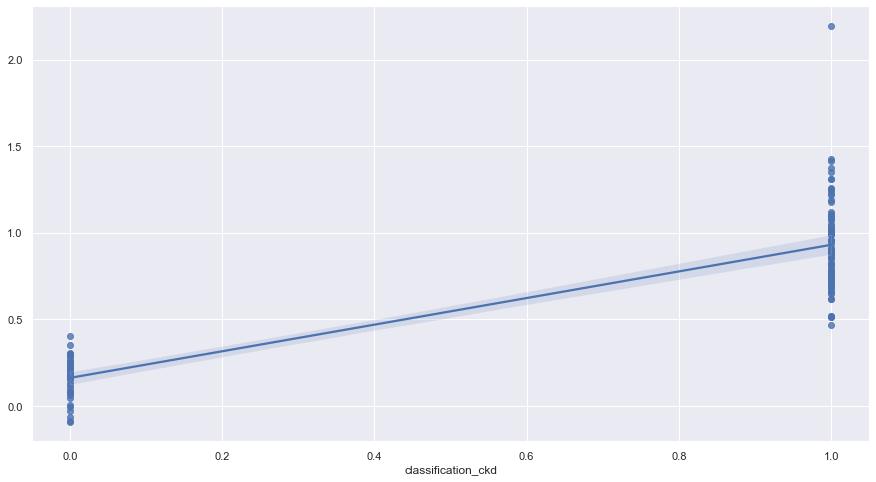

In [38]:
sns.regplot(data2_test, pred)

In [39]:
import statsmodels.api as sm

#Using train and test data from NOT standardized data
X = data1_train.fillna(data1_test.mean())
y = data2_train

#using add_constant lowers the R squared?
X2 = sm.add_constant(X)
traintest_data = sm.OLS(y, X2)

#traintest_data = sm.ols(y, X)
traintest_data2 = traintest_data.fit()
print(traintest_data2.summary())


                            OLS Regression Results                            
Dep. Variable:     classification_ckd   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     32.94
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.70e-63
Time:                        22:50:51   Log-Likelihood:                -3.9720
No. Observations:                 280   AIC:                             55.94
Df Residuals:                     256   BIC:                             143.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Users\crist\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
X1 = zdata1_train.fillna(data1_test.mean())
y1 = zdata2_train

z2 = sm.add_constant(X1)
ztraintest_data = sm.OLS(y1, z2)


ztraintest_data2 = ztraintest_data.fit()
print(ztraintest_data2.summary())

                            OLS Regression Results                            
Dep. Variable:     classification_ckd   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     44.34
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.40e-47
Time:                        22:50:51   Log-Likelihood:                -41.748
No. Observations:                 142   AIC:                             131.5
Df Residuals:                     118   BIC:                             202.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Users\crist\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
